In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [4]:
plt.rc('axes', lw = 1.5)
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.rc('xtick.major', size = 5, width = 3)
plt.rc('ytick.major', size = 5, width = 3)

In [5]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

Objective Function

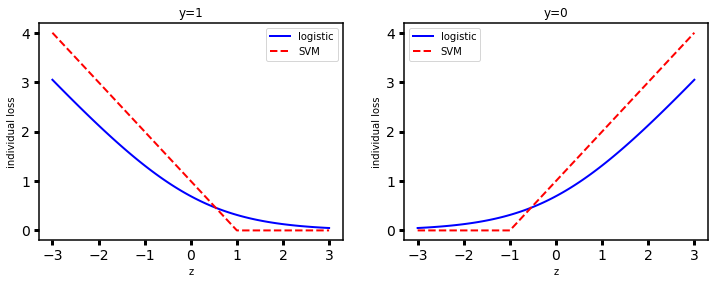

In [6]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
z = np.linspace(-3,3,num=100)
ax[0].plot(z,-np.log(sigmoid(z)),label='logistic',lw=2, color='b')
ax[1].plot(z,-np.log(1-sigmoid(z)),label='logistic',lw=2,color='b')
ax[0].plot(z,np.maximum(0,1-z),label='SVM',lw=2, color='r',linestyle='--')
ax[1].plot(z,np.maximum(0,1+z),label='SVM',lw=2,color='r',linestyle='--')
ax[0].set_title('y=1')
ax[1].set_title('y=0')
ax[0].set_xlabel('z')
ax[1].set_xlabel('z')
ax[0].set_ylabel('individual loss')
ax[1].set_ylabel('individual loss')
ax[0].legend()
ax[1].legend()
plt.show()

Example 4.1

In [7]:
from sklearn import datasets

In [8]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

data = pd.DataFrame(data=Xstan, columns=['petal length','petal width'])
data['target'] = iris['target']
data = data[data['target']!=2] # we will only focus on Iris-setosa and Iris-Versicolor
data.head()

,petal length,petal width,target
0,-1.340227,-1.315444,0
1,-1.340227,-1.315444,0
2,-1.397064,-1.315444,0
3,-1.283389,-1.315444,0
4,-1.340227,-1.315444,0


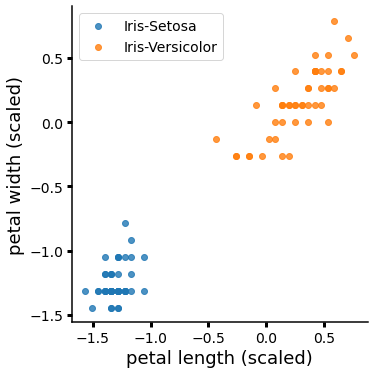

In [9]:
sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.legend(['Iris-Setosa','Iris-Versicolor'], fontsize = 14)
plt.xlabel('petal length (scaled)', fontsize = 18)
plt.ylabel('petal width (scaled)', fontsize = 18)
plt.show()